In [5]:
import gym
import minihack
import matplotlib.pyplot as plt
import IPython.display as display

from minihack import LevelGenerator
from minihack import RewardManager

In [25]:
# Define a 10x10 room and populate it with
# different objects, monster and features
lvl_gen = LevelGenerator(w=10, h=10)
lvl_gen.add_object("apple", "%")
lvl_gen.add_object("dagger", ")")
lvl_gen.add_trap(name="teleport")
lvl_gen.add_sink()
lvl_gen.add_monster("goblin")
lvl_gen.add_monster("fox", "d",place=(0,1))
# lvl_gen.fill_terrain("rect", "L", 0, 0, 9, 9)

In [26]:
# Define a reward manager
reward_manager = RewardManager()
# +1 reward and termination for eating
# an apple or wielding a dagger
reward_manager.add_eat_event("apple")
reward_manager.add_wield_event("dagger")
# -1 reward for standing on a sink
# but isn't required for terminating
# the episode
reward_manager.add_location_event("sink",
    reward=-1, terminal_required=False)

In [27]:
env = gym.make(
    "MiniHack-Skill-Custom-v0",
    des_file=lvl_gen.get_des(),
    reward_manager=reward_manager,
    observation_keys=("chars", "pixel") 
)

In [28]:
state = env.reset()
env.render()


Be careful!  New moon tonight.                                                  
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                  )..@......                                    
                                  d.........                                    
                                  ..........                                    
                                  ..........                                    
                           

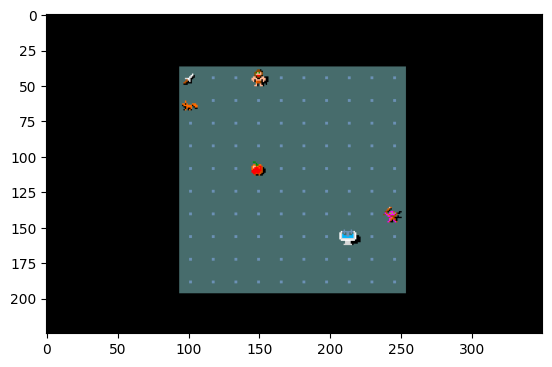

In [29]:
plt.imshow(state['pixel'][75:300, 450:800])

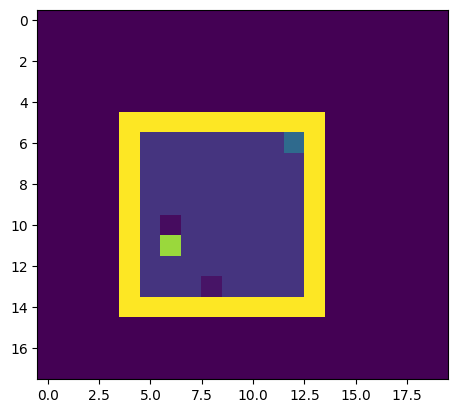

In [13]:
plt.imshow(state['chars'][2:20, 30:50])

In [1]:
# Per stampare gli id di tutte le mosse/azioni possibili in minihack
from nle.env.base import FULL_ACTIONS
from nle import _pynethack, nethack
MH_FULL_ACTIONS = list(FULL_ACTIONS)
MH_FULL_ACTIONS.remove(nethack.MiscDirection.UP)
print(MH_FULL_ACTIONS)

[<CompassDirection.N: 107>, <CompassDirection.E: 108>, <CompassDirection.S: 106>, <CompassDirection.W: 104>, <CompassDirection.NE: 117>, <CompassDirection.SE: 110>, <CompassDirection.SW: 98>, <CompassDirection.NW: 121>, <CompassDirectionLonger.N: 75>, <CompassDirectionLonger.E: 76>, <CompassDirectionLonger.S: 74>, <CompassDirectionLonger.W: 72>, <CompassDirectionLonger.NE: 85>, <CompassDirectionLonger.SE: 78>, <CompassDirectionLonger.SW: 66>, <CompassDirectionLonger.NW: 89>, <MiscDirection.DOWN: 62>, <MiscDirection.WAIT: 46>, <MiscAction.MORE: 13>, <Command.ADJUST: 225>, <Command.APPLY: 97>, <Command.ATTRIBUTES: 24>, <Command.CALL: 67>, <Command.CAST: 90>, <Command.CHAT: 227>, <Command.CLOSE: 99>, <Command.DIP: 228>, <Command.DROP: 100>, <Command.DROPTYPE: 68>, <Command.EAT: 101>, <Command.ENGRAVE: 69>, <Command.ENHANCE: 229>, <Command.ESC: 27>, <Command.FIGHT: 70>, <Command.FIRE: 102>, <Command.FORCE: 230>, <Command.INVENTORY: 105>, <Command.INVENTTYPE: 73>, <Command.INVOKE: 233>, <Co

In [5]:
len(MH_FULL_ACTIONS)

85

In [ ]:
"""
[0<CompassDirection.N: 107>, 
 1<CompassDirection.E: 108>, 
 2<CompassDirection.S: 106>, 
 3<CompassDirection.W: 104>, 
 4<CompassDirection.NE: 117>, 
 5<CompassDirection.SE: 110>, 
 6<CompassDirection.SW: 98>, 
 7<CompassDirection.NW: 121>, 
 8<CompassDirectionLonger.N: 75>, 
 9<CompassDirectionLonger.E: 76>, 
 10<CompassDirectionLonger.S: 74>, 
 11<CompassDirectionLonger.W: 72>, 
 12<CompassDirectionLonger.NE: 85>, 
 13<CompassDirectionLonger.SE: 78>, 
 14<CompassDirectionLonger.SW: 66>, 
 15<CompassDirectionLonger.NW: 89>, 
 16<MiscDirection.DOWN: 62>, 
 17<MiscDirection.WAIT: 46>, 
 18<MiscAction.MORE: 13>, 
 19<Command.ADJUST: 225>, 
 20<Command.APPLY: 97>, 
 21<Command.ATTRIBUTES: 24>, 
 22<Command.CALL: 67>, 
 23<Command.CAST: 90>, 
 24<Command.CHAT: 227>, 
 25<Command.CLOSE: 99>, 
 26<Command.DIP: 228>, 
 27<Command.DROP: 100>, 
 28<Command.DROPTYPE: 68>, 
 29<Command.EAT: 101>, 
 30<Command.ENGRAVE: 69>, 
 31<Command.ENHANCE: 229>, 
 32<Command.ESC: 27>, 
 33<Command.FIGHT: 70>, 
 34<Command.FIRE: 102>, 
 35<Command.FORCE: 230>, 
 36<Command.INVENTORY: 105>, 
 37<Command.INVENTTYPE: 73>, 
 38<Command.INVOKE: 233>, 
 39<Command.JUMP: 234>, 
 40<Command.KICK: 4>, 
 41<Command.LOOK: 58>, 
 42<Command.LOOT: 236>, 
 43<Command.MONSTER: 237>, 
 44<Command.MOVE: 109>, 
 45<Command.MOVEFAR: 77>, 
 46<Command.OFFER: 239>, 
 47<Command.OPEN: 111>, 
 48<Command.PAY: 112>, 
 49<Command.PICKUP: 44>, 
 50<Command.PRAY: 240>, 
 51<Command.PUTON: 80>, 
 52<Command.QUAFF: 113>, 
 53<Command.QUIVER: 81>, 
 54<Command.READ: 114>, 
 55<Command.REMOVE: 82>, 
 56<Command.RIDE: 210>, 
 57<Command.RUB: 242>, 
 58<Command.RUSH: 103>, 
 59<Command.RUSH2: 71>, 
 60<Command.SEARCH: 115>, 
 61<Command.SEEARMOR: 91>, 
 62<Command.SEERINGS: 61>, 
 63<Command.SEETOOLS: 40>, 
 64<Command.SEETRAP: 94>, 
 65<Command.SEEWEAPON: 41>, 
 66<Command.SHELL: 33>, 
 67<Command.SIT: 243>, 
 68<Command.SWAP: 120>, 
 69<Command.TAKEOFF: 84>, 
 70<Command.TAKEOFFALL: 65>, 
 71<Command.THROW: 116>, 
 72<Command.TIP: 212>, 
 73<Command.TURN: 244>, 
 74<Command.TWOWEAPON: 88>, 
 75<Command.UNTRAP: 245>, 
 76<Command.VERSIONSHORT: 118>, 
 77<Command.WEAR: 87>, 
 78<Command.WIELD: 119>, 
 79<Command.WIPE: 247>, 
 80<Command.ZAP: 122>, 
 81<TextCharacters.PLUS: 43>, 
 82<TextCharacters.QUOTE: 34>, 
 83<TextCharacters.DOLLAR: 36>, 
 84<TextCharacters.SPACE: 32>]
 """

In [6]:
# Queste azioni sono quelle che poi vengono passate e env.step(id_action)
# Eccone alcune delle più importanti:
# DIREZIONI
print(MH_FULL_ACTIONS[0])
print(MH_FULL_ACTIONS[1])
print(MH_FULL_ACTIONS[2])
print(MH_FULL_ACTIONS[3])
print(MH_FULL_ACTIONS[44])

CompassDirection.N
CompassDirection.E
CompassDirection.S
CompassDirection.W
Command.MOVE
